<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S---Regression-Classification/blob/main/Logistic_Regression/Mahfuzur_Rahman_Logistic_regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Machine learning is a research field in computer science, artificial intelligence, and statistics. The focus of machine learning is to train algorithms to learn patterns and make predictions from data. Machine learning is especially valuable because it lets us use computers to automate decision-making processes.

You’ll find machine learning applications everywhere. Netflix and Amazon use machine learning to make new product recommendations. Banks use machine learning to detect fraudulent activity in credit card transactions, and healthcare companies are beginning to use machine learning to monitor, assess, and diagnose patients.


# Excercise

Implement a simple machine learning algorithm in Python using Scikit-learn, a machine learning tool for Python. Using a database of breast cancer tumor information, you’ll use a Logistic Regression (LR) classifer that predicts whether or not a tumor is malignant or benign.

![img](https://user-images.githubusercontent.com/67789350/88600482-f94fa780-d08b-11ea-9ab5-e205b154b725.png)

To get us started, let us import the Breast Cancer Dataset from within Sklearn library

In [19]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['label'] = pd.Series(cancer.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
df.shape

(569, 31)

In [21]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [23]:
df_corr = df.corr()
df_corr = df_corr['label'][:-1]
df_corr[abs(df_corr)>=.70].sort_values()

worst concave points   -0.793566
worst perimeter        -0.782914
mean concave points    -0.776614
worst radius           -0.776454
mean perimeter         -0.742636
worst area             -0.733825
mean radius            -0.730029
mean area              -0.708984
Name: label, dtype: float64

In [24]:
x = df[['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area']]
y = df[['label']]

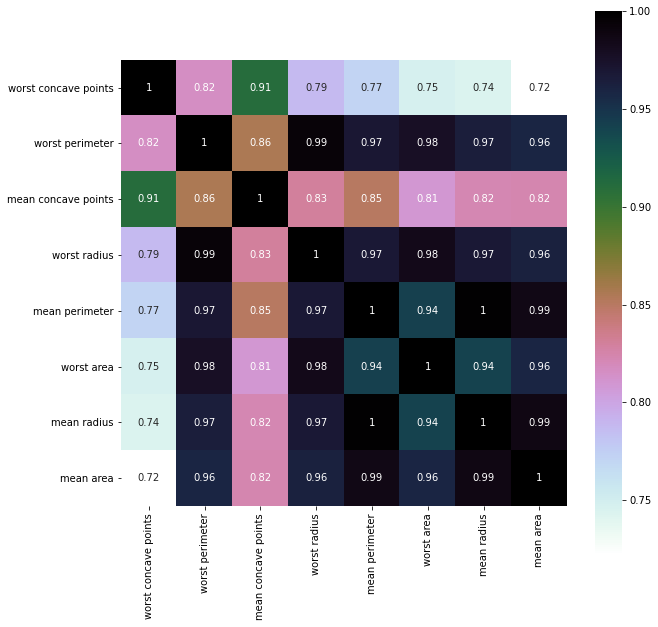

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(), annot=True, cmap='cubehelix_r',square=True) 
plt.show()

# We are set !

Now you can either use the data in the form I made it , or you can figure out your own personal way of creating a solution to the project !

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [27]:
print('Dimension of train_x dataframe:',x_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)
print('Dimension of val_x dataframe:',x_test.shape)
print('Dimension of val_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (426, 8)
Dimension of train_y dataframe: (426, 1)
Dimension of val_x dataframe: (143, 8)
Dimension of val_y dataframe: (143, 1)


In [28]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
lorg = LogisticRegression(random_state = 0)
lorg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = lorg.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [31]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred, labels = [0, 1]))
print(metrics.classification_report(y_test, y_pred, labels = [0,1]))


[[50  3]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [32]:
d = {'Prediction':y_pred}
pred_comp =pd.DataFrame(d)

pred_comp

,Prediction
0,0
1,1
2,1
3,1
4,1
...,...
138,0
139,1
140,1
141,1


In [33]:
f = y_test.reset_index()
f = f.drop(['index'], axis=1)
f

,label
0,0
1,1
2,1
3,1
4,1
...,...
138,0
139,1
140,1
141,1


In [34]:
df = pd.concat([pred_comp, f], axis=1)
df.head(143)

,Prediction,label
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,1,1
141,1,1


In [35]:
f.value_counts()

label
1        90
0        53
dtype: int64

In [36]:
pred_comp.value_counts()

Prediction
1             91
0             52
dtype: int64